<a href="https://colab.research.google.com/github/sevginurbilgin/EDA/blob/main/FeatureExtraction_1_sec_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install heartpy
!pip install neurokit2
import numpy as np
import os
import scipy.stats
import heartpy as hp
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsorted
import neurokit2 as nk
import pickle
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
main_path='/content/drive/MyDrive/8Haziran2023_veriler/StroopTest/'
output_path_graphs = main_path + 'Analiz/GRAPHICS/'
output_path_features = main_path + 'Analiz/FEATURES/'

In [ ]:
with open(main_path+'Pickled_Data/'+'BVP_baseline.pkl', 'rb') as file:
    BVP_baseline = pickle.load(file)
with open(main_path+'Pickled_Data/'+'EDA_baseline.pkl', 'rb') as file:
    EDA_baseline = pickle.load(file)
with open(main_path+'Pickled_Data/'+'ST_baseline.pkl', 'rb') as file:
    ST_baseline = pickle.load(file)

with open(main_path+'Pickled_Data/'+'BVP_stroop.pkl', 'rb') as file:
    BVP_stroop = pickle.load(file)
with open(main_path+'Pickled_Data/'+'EDA_stroop.pkl', 'rb') as file:
    EDA_stroop = pickle.load(file)
with open(main_path+'Pickled_Data/'+'ST_stroop.pkl', 'rb') as file:
    ST_stroop = pickle.load(file)

with open(main_path+'Pickled_Data/'+'BVP_ns.pkl', 'rb') as file:
    BVP_ns = pickle.load(file)
with open(main_path+'Pickled_Data/'+'EDA_ns.pkl', 'rb') as file:
    EDA_ns = pickle.load(file)
with open(main_path+'Pickled_Data/'+'ST_ns.pkl', 'rb') as file:
    ST_ns = pickle.load(file)


Text(0.5, 1.0, 'ST')

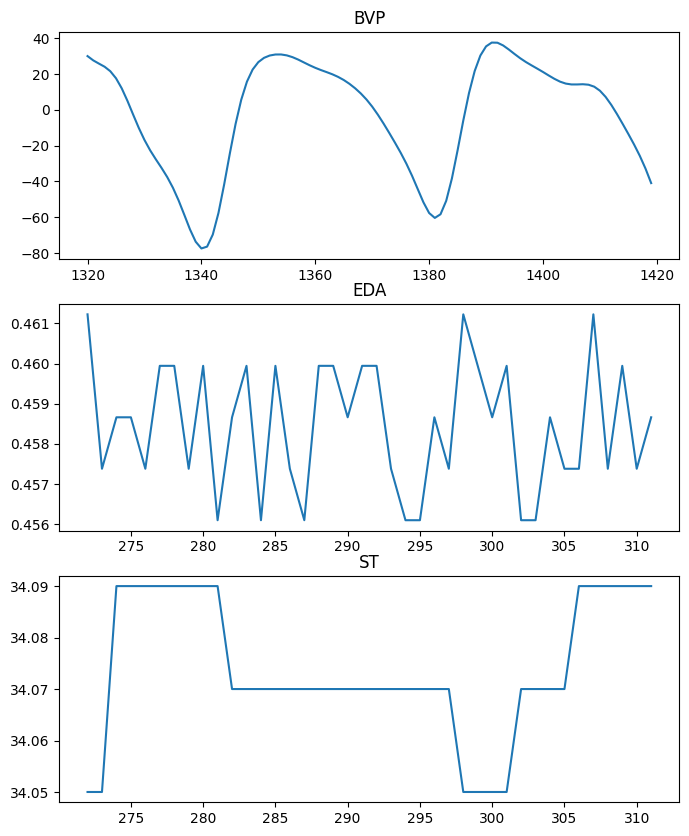

In [ ]:
# deneme

bvp=BVP_baseline[0][200:300]
eda=EDA_baseline[0][200:300]
st=ST_baseline[0][200:300]

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

axs[0].plot(bvp)
axs[0].set_title('BVP')
axs[1].plot(eda)
axs[1].set_title('EDA')
axs[2].plot(st)
axs[2].set_title('ST')

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


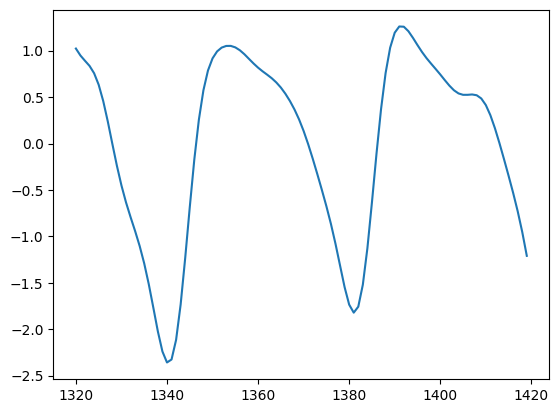

In [ ]:
normalized_BVP = (bvp - np.mean(bvp)) / np.std(bvp)

plt.plot(normalized_BVP)

In [ ]:
def extract_features_st(ST):
    ST_mean =  np.mean(ST)
    ST_mean = pd.DataFrame([ST_mean])

    ST_median =  np.median(ST)
    ST_median = pd.DataFrame([ST_median])

    ST_std = np.std(ST)
    ST_std = pd.DataFrame([ST_std])

    ST_min = np.min(ST)
    ST_min = pd.DataFrame([ST_min])


    ST_max = np.max(ST)
    ST_max = pd.DataFrame([ST_max])

    ST_skew = scipy.stats.skew(ST)
    ST_skew = pd.DataFrame([ST_skew])


    ST_kurt = scipy.stats.kurtosis(ST)
    ST_kurt = pd.DataFrame([ST_kurt])


    ST_quantile05 = np.quantile(ST,0.05)
    ST_quantile05 = pd.DataFrame([ST_quantile05])


    ST_quantile25 = np.quantile(ST,0.25)
    ST_quantile25 = pd.DataFrame([ST_quantile25])


    ST_quantile75 = np.quantile(ST,0.75)
    ST_quantile75 = pd.DataFrame([ST_quantile75])


    ST_quantile95 = np.quantile(ST,0.95)
    ST_quantile95 = pd.DataFrame([ST_quantile95])


    ST_var = np.var(ST)
    ST_var = pd.DataFrame([ST_var])


    ST_range = scipy.stats.iqr(ST,rng = (0,100))
    ST_range= pd.DataFrame([ST_range])


    ST_max_min = np.max(ST)/np.min(ST)
    ST_max_min = pd.DataFrame([ST_max_min])


    ST_iqr = scipy.stats.iqr(ST,rng = (25,75))
    ST_iqr= pd.DataFrame([ST_iqr])


    ST_coeffvar = scipy.stats.variation(ST)
    ST_coeffvar= pd.DataFrame([ST_coeffvar])

    st_first_absolute_difference = np.mean(np.abs(np.diff(ST)))
    ST_first_abs_diff=st_first_absolute_difference
    ST_first_abs_diff=pd.DataFrame([ST_first_abs_diff])

    st_second_absolute_difference = np.mean(np.abs(np.diff(np.diff(ST))))
    ST_second_abs_diff=st_second_absolute_difference
    ST_second_abs_diff=pd.DataFrame([ST_second_abs_diff])

    normalized_ST = (ST - np.mean(ST)) / np.std(ST)

    st_first_absolute_difference_normalized = np.mean(np.abs(np.diff(normalized_ST)))
    ST_first_abs_diff_norm=st_first_absolute_difference_normalized
    ST_first_abs_diff_norm=pd.DataFrame([ST_first_abs_diff_norm])

    st_second_absolute_difference_normalized = np.mean(np.abs(np.diff(np.diff(normalized_ST))))
    ST_second_abs_diff_norm=st_second_absolute_difference_normalized
    ST_second_abs_diff_norm=pd.DataFrame([ST_second_abs_diff_norm])


    Features = [
    ST_mean ,
    ST_median ,
    ST_std ,
    ST_min ,
    ST_max ,
    ST_skew ,
    ST_kurt ,
    ST_quantile05 ,
    ST_quantile25 ,
    ST_quantile75 ,
    ST_quantile95 ,
    ST_var ,
    ST_range ,
    ST_max_min ,
    ST_iqr ,
    ST_coeffvar ,
    ST_first_abs_diff ,
    ST_second_abs_diff ,
    ST_first_abs_diff_norm ,
    ST_second_abs_diff_norm
    ]
    Features_ = pd.concat(Features,axis = 1)


    Features_.columns = [
    "ST_mean" ,
    "ST_median" ,
    "ST_std" ,
    "ST_min" ,
    "ST_max" ,
    "ST_skew" ,
    "ST_kurt" ,
    "ST_quantile05" ,
    "ST_quantile25" ,
    "ST_quantile75" ,
    "ST_quantile95" ,
    "ST_var" ,
    "ST_range" ,
    "ST_max_min" ,
    "ST_iqr" ,
    "ST_coeffvar" ,
    "ST_first_abs_diff" ,
    "ST_second_abs_diff",
    "ST_first_abs_diff_norm" ,
    "ST_second_abs_diff_norm" ]

    return Features_


In [ ]:
from scipy.ndimage import label
def extract_features_eda(EDA_Signal):
    # İlgili sütunları çıkartalım (örneğin 'Column_B' ve 'Column_C')
    #columns_to_drop = ['Label', 'Participant_Id']
    #EDA = EDA_Signal.drop(columns=columns_to_drop, axis=1)
    EDA =EDA_Signal
    _sampling_rate=4
    EDA = nk.eda_clean(EDA, sampling_rate=_sampling_rate)
    gsr_scr_scl = nk.eda_phasic(EDA, sampling_rate = _sampling_rate)
    eda_phasic = gsr_scr_scl["EDA_Phasic"].values
    eda_tonic = gsr_scr_scl["EDA_Tonic"].values
    SCR=eda_phasic
    SCL=eda_tonic

    eda_mean = np.mean(EDA)
    EDA_mean=eda_mean
    scr_mean = np.mean(SCR)
    SCR_mean=scr_mean
    scl_mean = np.mean(SCL)
    SCL_mean=scl_mean
    EDA_mean = pd.DataFrame([EDA_mean])
    SCL_mean = pd.DataFrame([SCL_mean])
    SCR_mean = pd.DataFrame([SCR_mean])


    eda_median = np.median(EDA)
    EDA_median=eda_median
    scr_median = np.median(SCR)
    SCR_median=scr_median
    scl_median = np.median(SCL)
    SCL_median=scl_median
    EDA_median = pd.DataFrame([EDA_median])
    SCR_median = pd.DataFrame([SCR_median])
    SCL_median = pd.DataFrame([SCL_median])



    eda_std = np.std(EDA)
    EDA_std=eda_std
    scr_std = np.std(SCR)
    SCR_std=scr_std
    scl_std = np.std(SCL)
    SCL_std=scl_std
    EDA_std = pd.DataFrame([EDA_std])
    SCR_std = pd.DataFrame([SCR_std])
    SCL_std = pd.DataFrame([SCL_std])


    eda_min = np.min(EDA)
    EDA_min=eda_min
    scr_min = np.min(SCR)
    SCR_min=scr_min
    scl_min = np.min(SCL)
    SCL_min=scl_min
    EDA_min = pd.DataFrame([EDA_min])
    SCR_min = pd.DataFrame([SCR_min])
    SCL_min = pd.DataFrame([SCL_min])



    eda_max = np.max(EDA)
    EDA_max=eda_max
    scr_max = np.max(SCR)
    SCR_max=scr_max
    scl_max = np.max(SCL)
    SCL_max=scl_max
    EDA_max = pd.DataFrame([EDA_max])
    SCR_max = pd.DataFrame([SCR_max])
    SCL_max = pd.DataFrame([SCL_max])


    eda_skew = scipy.stats.skew(EDA)
    EDA_skew=eda_skew
    scr_skew = scipy.stats.skew(SCR)
    SCR_skew=scr_skew
    scl_skew = scipy.stats.skew(SCL)
    SCL_skew=scl_skew
    EDA_skew = pd.DataFrame([EDA_skew])
    SCR_skew = pd.DataFrame([SCR_skew])
    SCL_skew = pd.DataFrame([SCL_skew])


    eda_kurt = scipy.stats.kurtosis(EDA)
    EDA_kurt=eda_kurt
    scr_kurt = scipy.stats.kurtosis(SCR)
    SCR_kurt=scr_kurt
    scl_kurt = scipy.stats.kurtosis(SCL)
    SCL_kurt=scl_kurt
    EDA_kurt = pd.DataFrame([EDA_kurt])
    SCR_kurt = pd.DataFrame([SCR_kurt])
    SCL_kurt = pd.DataFrame([SCL_kurt])



    eda_quantile05 = np.quantile(EDA,0.05)
    EDA_quantile05=eda_quantile05
    scr_quantile05 = np.quantile(SCR,0.05)
    SCR_quantile05=scr_quantile05
    scl_quantile05 = np.quantile(SCL,0.05)
    SCL_quantile05=scl_quantile05
    EDA_quantile05 = pd.DataFrame([EDA_quantile05])
    SCR_quantile05 = pd.DataFrame([SCR_quantile05])
    SCL_quantile05 = pd.DataFrame([SCL_quantile05])



    eda_quantile25 = np.quantile(EDA,0.25)
    EDA_quantile25=eda_quantile25
    scr_quantile25 = np.quantile(SCR,0.25)
    SCR_quantile25=scr_quantile25
    scl_quantile25 = np.quantile(SCL,0.25)
    SCL_quantile25=scl_quantile25
    EDA_quantile25 = pd.DataFrame([EDA_quantile25])
    SCR_quantile25 = pd.DataFrame([SCR_quantile25])
    SCL_quantile25 = pd.DataFrame([SCL_quantile25])



    eda_quantile75 = np.quantile(EDA,0.75)
    EDA_quantile75=eda_quantile75
    scr_quantile75 = np.quantile(SCR,0.75)
    SCR_quantile75=scr_quantile75
    scl_quantile75 = np.quantile(SCL,0.75)
    SCL_quantile75=scl_quantile75
    EDA_quantile75 = pd.DataFrame([EDA_quantile75])
    SCR_quantile75 = pd.DataFrame([SCR_quantile75])
    SCL_quantile75 = pd.DataFrame([SCL_quantile75])



    eda_quantile95 = np.quantile(EDA,0.95)
    EDA_quantile95=eda_quantile95
    scr_quantile95 = np.quantile(SCR,0.95)
    SCR_quantile95=scr_quantile95
    scl_quantile95 = np.quantile(SCL,0.95)
    SCL_quantile95=scl_quantile95
    EDA_quantile95 = pd.DataFrame([EDA_quantile95])
    SCR_quantile95 = pd.DataFrame([SCR_quantile95])
    SCL_quantile95 = pd.DataFrame([SCL_quantile95])


    eda_var = np.var(EDA)
    EDA_var=eda_var
    scr_var = np.var(SCR)
    SCR_var=scr_var
    scl_var = np.var(SCL)
    SCL_var=scl_var
    EDA_var = pd.DataFrame([EDA_var])
    SCR_var = pd.DataFrame([SCR_var])
    SCL_var = pd.DataFrame([SCL_var])


    eda_range = scipy.stats.iqr(EDA,rng = (0,100))
    EDA_range=eda_range
    scr_range = scipy.stats.iqr(SCR,rng = (0,100))
    SCR_range=scr_range
    scl_range = scipy.stats.iqr(SCL,rng = (0,100))
    SCL_range=scl_range
    EDA_range= pd.DataFrame([EDA_range])
    SCR_range= pd.DataFrame([SCR_range])
    SCL_range= pd.DataFrame([SCL_range])


    eda_max_min = np.max(EDA)/np.min(EDA)
    EDA_max_min=eda_max_min
    scr_max_min = np.max(SCR)/np.min(SCR)
    SCR_max_min=scr_max_min
    scl_max_min = np.max(SCL)/np.min(SCL)
    SCL_max_min=scl_max_min
    EDA_max_min = pd.DataFrame([EDA_max_min])
    SCR_max_min = pd.DataFrame([SCR_max_min])
    SCL_max_min = pd.DataFrame([SCL_max_min])


    eda_iqr = scipy.stats.iqr(EDA,rng = (25,75))
    EDA_iqr=eda_iqr
    scr_iqr = scipy.stats.iqr(SCR,rng = (25,75))
    SCR_iqr=scr_iqr
    scl_iqr = scipy.stats.iqr(SCL,rng = (25,75))
    SCL_iqr=scl_iqr
    EDA_iqr= pd.DataFrame([EDA_iqr])
    SCR_iqr= pd.DataFrame([SCR_iqr])
    SCL_iqr= pd.DataFrame([SCL_iqr])



    eda_coeffvar = scipy.stats.variation(EDA)
    EDA_coeffvar=eda_coeffvar
    scr_coeffvar = scipy.stats.variation(SCR)
    SCR_coeffvar=scr_coeffvar
    scl_coeffvar = scipy.stats.variation(SCL)
    SCL_coeffvar=scl_coeffvar
    EDA_coeffvar= pd.DataFrame([EDA_coeffvar])
    SCR_coeffvar= pd.DataFrame([SCR_coeffvar])
    SCL_coeffvar= pd.DataFrame([SCL_coeffvar])



    eda_first_absolute_difference = np.mean(np.abs(np.diff(EDA)))
    EDA_first_abs_diff=eda_first_absolute_difference
    scr_first_absolute_difference = np.mean(np.abs(np.diff(SCR)))
    SCR_first_abs_diff=scr_first_absolute_difference
    scl_first_absolute_difference = np.mean(np.abs(np.diff(SCL)))
    SCL_first_abs_diff=scl_first_absolute_difference

    EDA_first_abs_diff=pd.DataFrame([EDA_first_abs_diff])
    SCR_first_abs_diff=pd.DataFrame([SCR_first_abs_diff])
    SCL_first_abs_diff=pd.DataFrame([SCL_first_abs_diff])

    eda_second_absolute_difference = np.mean(np.abs(np.diff(np.diff(EDA))))
    EDA_second_abs_diff=eda_second_absolute_difference
    scr_second_absolute_difference = np.mean(np.abs(np.diff(np.diff(SCR))))
    SCR_second_abs_diff=scr_second_absolute_difference
    scl_second_absolute_difference = np.mean(np.abs(np.diff(np.diff(SCL))))
    SCL_second_abs_diff=scl_second_absolute_difference

    EDA_second_abs_diff=pd.DataFrame([EDA_second_abs_diff])
    SCR_second_abs_diff=pd.DataFrame([SCR_second_abs_diff])
    SCL_second_abs_diff=pd.DataFrame([SCL_second_abs_diff])

    normalized_EDA = (EDA - eda_mean) / eda_std
    normalized_SCR = (SCR - scr_mean) / scr_std
    normalized_SCL = (SCL - scl_mean) / scl_std

    eda_first_absolute_difference_normalized = np.mean(np.abs(np.diff(normalized_EDA)))
    EDA_first_abs_diff_norm=eda_first_absolute_difference_normalized
    eda_second_absolute_difference_normalized = np.mean(np.abs(np.diff(np.diff(normalized_EDA))))
    EDA_second_abs_diff_norm=eda_second_absolute_difference_normalized

    scr_first_absolute_difference_normalized = np.mean(np.abs(np.diff(normalized_SCR)))
    SCR_first_abs_diff_norm=scr_first_absolute_difference_normalized
    scr_second_absolute_difference_normalized = np.mean(np.abs(np.diff(np.diff(normalized_SCR))))
    SCR_second_abs_diff_norm=scr_second_absolute_difference_normalized

    scl_first_absolute_difference_normalized = np.mean(np.abs(np.diff(normalized_SCL)))
    SCL_first_abs_diff_norm=scl_first_absolute_difference_normalized
    scl_second_absolute_difference_normalized = np.mean(np.abs(np.diff(np.diff(normalized_SCL))))
    SCL_second_abs_diff_norm=scl_second_absolute_difference_normalized

    EDA_first_abs_diff_norm=pd.DataFrame([EDA_first_abs_diff_norm])
    SCR_first_abs_diff_norm=pd.DataFrame([SCR_first_abs_diff_norm])
    SCL_first_abs_diff_norm=pd.DataFrame([SCL_first_abs_diff_norm])

    EDA_second_abs_diff_norm=pd.DataFrame([EDA_second_abs_diff_norm])
    SCR_second_abs_diff_norm=pd.DataFrame([SCR_second_abs_diff_norm])
    SCL_second_abs_diff_norm=pd.DataFrame([SCL_second_abs_diff_norm])

    # Get phasic component
    eda = nk.eda_phasic(EDA, sampling_rate=_sampling_rate)
    # Find peaks
    _, kim2004     = nk.eda_peaks(SCR, sampling_rate=_sampling_rate, method="kim2004")
    _, neurokit    = nk.eda_peaks(SCR, sampling_rate=_sampling_rate, method="neurokit")
    #_, nabian2018  = 5 #nk.eda_peaks(SCR, sampling_rate=_sampling_rate, method="nabian2018")
    average_peaks = round(( len(kim2004["SCR_Peaks"]) + len(neurokit["SCR_Peaks"])) / 2)
    SCR_Peaks = average_peaks
    SCR_Peaks = pd.DataFrame([SCR_Peaks])

 #   Label= 5#EDA['Label']
 #   Participant_Id= 2#EDA['Participant_Id']


    Features = [
    EDA_mean ,
    SCR_mean ,
    SCL_mean,
    EDA_median ,
    SCR_median ,
    SCL_median ,
    EDA_std ,
    SCR_std,
    SCL_std,
    EDA_min ,
    SCR_min ,
    SCL_min ,
    EDA_max ,
    SCR_max ,
    SCL_max ,
    EDA_skew ,
    SCR_skew ,
    SCL_skew,
    EDA_kurt ,
    SCR_kurt,
    SCL_kurt,
    EDA_quantile05 ,
    SCR_quantile05,
    SCL_quantile05,
    EDA_quantile25 ,
    SCR_quantile25,
    SCL_quantile25,
    EDA_quantile75 ,
    SCR_quantile75,
    SCL_quantile75,
    EDA_quantile95 ,
    SCR_quantile95,
    SCL_quantile95,
    EDA_var ,
    SCR_var,
    SCL_var,
    EDA_range ,
    SCR_range,
    SCL_range,
    EDA_max_min ,
    SCR_max_min,
    SCL_max_min,
    EDA_iqr ,
    SCR_iqr,
    SCL_iqr,
    EDA_coeffvar ,
    SCR_coeffvar,
    SCL_coeffvar,
    EDA_first_abs_diff,
    SCR_first_abs_diff,
    SCL_first_abs_diff,
    EDA_second_abs_diff,
    SCL_second_abs_diff,
    SCR_second_abs_diff,
    EDA_first_abs_diff_norm,
    SCR_first_abs_diff_norm,
    SCL_first_abs_diff_norm,
    EDA_second_abs_diff_norm,
    SCR_second_abs_diff_norm,
    SCL_second_abs_diff_norm,
    SCR_Peaks
#    Label,
#    Participant_Id
    ]
    Features_ = pd.concat(Features,axis = 1)


    Features_.columns = [
    "EDA_mean",
    "SCR_mean",
    "SCL_mean",
    "EDA_median",
    "SCR_median",
    "SCL_median",
    "EDA_std",
    "SCR_std",
    "SCL_std",
    "EDA_min",
    "SCR_min",
    "SCL_min",
    "EDA_max",
    "SCR_max",
    "SCL_max",
    "EDA_skew",
    "SCR_skew",
    "SCL_skew",
    "EDA_kurt",
    "SCR_kurt",
    "SCL_kurt",
    "EDA_quantile05",
    "SCR_quantile05",
    "SCL_quantile05",
    "EDA_quantile25",
    "SCR_quantile25",
    "SCL_quantile25",
    "EDA_quantile75",
    "SCR_quantile75",
    "SCL_quantile75",
    "EDA_quantile95",
    "SCR_quantile95",
    "SCL_quantile95",
    "EDA_var",
    "SCR_var",
    "SCL_var",
    "EDA_range",
    "SCR_range",
    "SCL_range",
    "EDA_max_min",
    "SCR_max_min",
    "SCL_max_min",
    "EDA_iqr",
    "SCR_iqr",
    "SCL_iqr",
    "EDA_coeffvar",
    "SCR_coeffvar",
    "SCL_coeffvar",
    "EDA_first_abs_diff",
    "SCR_first_abs_diff",
    "SCL_first_abs_diff",
    "EDA_second_abs_diff",
    "SCL_second_abs_diff",
    "SCR_second_abs_diff",
    "EDA_first_abs_diff_norm",
    "SCR_first_abs_diff_norm",
    "SCL_first_abs_diff_norm",
    "EDA_second_abs_diff_norm",
    "SCR_second_abs_diff_norm",
    "SCL_second_abs_diff_norm",
    "SCR_Peaks"
 #   "Label",
 #   "Participant_Id"
    ]
    return Features_

In [ ]:
from cmath import nan

def extract_features_bvp(BVP):
  BVP_mean =  np.mean(BVP)
  BVP_mean = pd.DataFrame([BVP_mean])

  BVP_median = np.median(BVP)
  BVP_median = pd.DataFrame([BVP_median])

  BVP_std = np.std(BVP)
  BVP_std = pd.DataFrame([BVP_std])

  BVP_min = np.min(BVP)
  BVP_min = pd.DataFrame([BVP_min])

  BVP_max = np.max(BVP)
  BVP_max = pd.DataFrame([BVP_max])

  BVP_skew = scipy.stats.skew(BVP)
  BVP_skew = pd.DataFrame([BVP_skew])

  BVP_kurt = scipy.stats.kurtosis(BVP)
  BVP_kurt = pd.DataFrame([BVP_kurt])

  BVP_quantile05 = np.quantile(BVP,0.05)
  BVP_quantile05 = pd.DataFrame([BVP_quantile05])

  BVP_quantile25 = np.quantile(BVP,0.25)
  BVP_quantile25 = pd.DataFrame([BVP_quantile25])

  BVP_quantile75 = np.quantile(BVP,0.75)
  BVP_quantile75 = pd.DataFrame([BVP_quantile75])

  BVP_quantile95 = np.quantile(BVP,0.95)
  BVP_quantile95 = pd.DataFrame([BVP_quantile95])

  BVP_var = np.var(BVP)
  BVP_var = pd.DataFrame([BVP_var])

  BVP_range = scipy.stats.iqr(BVP,rng = (0,100))
  BVP_range= pd.DataFrame([BVP_range])

  BVP_max_min = np.max(BVP)/np.min(BVP)
  BVP_max_min = pd.DataFrame([BVP_max_min])

  BVP_iqr = scipy.stats.iqr(BVP,rng = (25,75))
  BVP_iqr= pd.DataFrame([BVP_iqr])

  BVP_coeffvar = scipy.stats.variation(BVP)
  BVP_coeffvar= pd.DataFrame([BVP_coeffvar])


  try:
    wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
    bvp_bpm = m['bpm']
  except:
    bvp_bpm=float("NaN")
  BVP_bpm = bvp_bpm
  BVP_bpm = pd.DataFrame([BVP_bpm])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_ibi = m['ibi']
  except:
    bvp_ibi=float("NaN")
  BVP_ibi = bvp_ibi
  BVP_ibi = pd.DataFrame([BVP_ibi])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_sdnn = m['sdnn']
  except:
      bvp_sdnn=float("NaN")
  BVP_sdnn = bvp_sdnn
  BVP_sdnn = pd.DataFrame([BVP_sdnn])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_sdsd = m['sdsd']
  except:
      bvp_sdsd=float("NaN")
  BVP_sdsd = bvp_sdsd
  BVP_sdsd = pd.DataFrame([BVP_sdsd])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_rmssd = m['rmssd']
  except:
      bvp_rmssd=float("NaN")
  BVP_rmssd = bvp_rmssd
  BVP_rmssd = pd.DataFrame([BVP_rmssd])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_pnn20 = m['pnn20']
  except:
      bvp_pnn20=float("NaN")
  BVP_pnn20 = bvp_pnn20
  BVP_pnn20 = pd.DataFrame([BVP_pnn20])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_pnn50 = m['pnn50']
  except:
      bvp_pnn50=float("NaN")
  BVP_pnn50 = bvp_pnn50
  BVP_pnn50 = pd.DataFrame([BVP_pnn50])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_hr_mad = m['hr_mad']
  except:
      bvp_hr_mad=float("NaN")
  BVP_hr_mad = bvp_hr_mad
  BVP_hr_mad= pd.DataFrame([BVP_hr_mad])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_sd1 = m['sd1']
  except:
      bvp_sd1=float("NaN")
  BVP_sd1 = bvp_sd1
  BVP_sd1 = pd.DataFrame([BVP_sd1])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_sd2 = m['sd2']
  except:
      bvp_sd2=float("NaN")
  BVP_sd2 = bvp_sd2
  BVP_sd2 = pd.DataFrame([BVP_sd2])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_s = m['s']
  except:
      bvp_s=float("NaN")
  BVP_s = bvp_s
  BVP_s = pd.DataFrame([BVP_s])


  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_sd1_sd2 = m['sd1/sd2']
  except:
      bvp_sd1_sd2=float("NaN")
  BVP_sd1_sd2 = bvp_sd1_sd2
  BVP_sd1_sd2 = pd.DataFrame([BVP_sd1_sd2])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_br = m['breathingrate']
  except:
      bvp_br=float("NaN")
  BVP_br = bvp_br
  BVP_br = pd.DataFrame([BVP_br])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_vlf = m['vlf']
  except:
      bvp_vlf=float("NaN")
  BVP_vlf = bvp_vlf
  BVP_vlf = pd.DataFrame([BVP_vlf])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_lf = m['lf']
  except:
      bvp_lf=float("NaN")
  BVP_lf = bvp_lf
  BVP_lf = pd.DataFrame([BVP_lf])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_hf = m['hf']
  except:
      bvp_hf=float("NaN")
  BVP_hf = bvp_hf
  BVP_hf = pd.DataFrame([BVP_hf])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_lf_hf = m['lf/hf']
  except:
      bvp_lf_hf=float("NaN")
  BVP_lf_hf = bvp_lf_hf
  BVP_lf_hf = pd.DataFrame([BVP_lf_hf])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_p_total = m['p_total']
  except:
      bvp_p_total=float("NaN")
  BVP_p_total = bvp_p_total
  BVP_p_total = pd.DataFrame([BVP_p_total])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_vlf_perc = m['vlf_perc']
  except:
      bvp_vlf_perc=float("NaN")
  BVP_vlf_perc = bvp_vlf_perc
  BVP_vlf_perc = pd.DataFrame([BVP_vlf_perc])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_lf_perc = m['lf_perc']
  except:
      bvp_lf_perc=float("NaN")
  BVP_lf_perc = bvp_lf_perc
  BVP_lf_perc = pd.DataFrame([BVP_lf_perc])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_hf_perc = m['hf_perc']
  except:
      bvp_hf_perc=float("NaN")
  BVP_hf_perc = bvp_hf_perc
  BVP_hf_perc = pd.DataFrame([BVP_hf_perc])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_lf_nu = m['lf_nu']
  except:
      bvp_lf_nu=float("NaN")
  BVP_lf_nu = bvp_lf_nu
  BVP_lf_nu = pd.DataFrame([BVP_lf_nu])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_hf_nu = m['hf_nu']
  except:
      bvp_hf_nu=float("NaN")
  BVP_hf_nu = bvp_hf_nu
  BVP_hf_nu = pd.DataFrame([BVP_hf_nu])

  bvp_first_absolute_difference = np.mean(np.abs(np.diff(BVP)))
  BVP_first_abs_diff=bvp_first_absolute_difference
  BVP_first_abs_diff=pd.DataFrame([BVP_first_abs_diff])

  bvp_second_absolute_difference = np.mean(np.abs(np.diff(np.diff(BVP))))
  BVP_second_abs_diff=bvp_second_absolute_difference
  BVP_second_abs_diff=pd.DataFrame([BVP_second_abs_diff])

  normalized_BVP = (BVP - np.mean(BVP)) / np.std(BVP) #Z-score normalization or standardization. It scales the data such that it has a mean of 0 and a standard deviation of 1. By doing so, it transforms the data into a standard normal distribution

  bvp_first_absolute_difference_normalized = np.mean(np.abs(np.diff(normalized_BVP)))
  BVP_first_abs_diff_norm=bvp_first_absolute_difference_normalized
  BVP_first_abs_diff_norm=pd.DataFrame([BVP_first_abs_diff_norm])

  bvp_second_absolute_difference_normalized = np.mean(np.abs(np.diff(np.diff(normalized_BVP))))
  BVP_second_abs_diff_norm=bvp_second_absolute_difference_normalized
  BVP_second_abs_diff_norm=pd.DataFrame([BVP_second_abs_diff_norm])

  Features = [
  BVP_mean ,
  BVP_median ,
  BVP_std ,
  BVP_min ,
  BVP_max ,
  BVP_skew ,
  BVP_kurt ,
  BVP_quantile05 ,
  BVP_quantile25 ,
  BVP_quantile75 ,
  BVP_quantile95 ,
  BVP_var ,
  BVP_range ,
  BVP_max_min ,
  BVP_iqr ,
  BVP_coeffvar ,
  BVP_bpm ,
  BVP_ibi ,
  BVP_sdnn ,
  BVP_sdsd ,
  BVP_rmssd ,
  BVP_pnn20 ,
  BVP_pnn50 ,
  BVP_hr_mad ,
  BVP_sd1 ,
  BVP_sd2 ,
  BVP_s ,
  BVP_sd1_sd2 ,
  BVP_br ,
  BVP_vlf ,
  BVP_lf ,
  BVP_hf ,
  BVP_lf_hf ,
  BVP_p_total ,
  BVP_vlf_perc ,
  BVP_lf_perc ,
  BVP_hf_perc ,
  BVP_lf_nu ,
  BVP_hf_nu,
  BVP_first_abs_diff,
  BVP_second_abs_diff,
  BVP_first_abs_diff_norm,
  BVP_second_abs_diff_norm
  ]

  Features_ = pd.concat(Features,axis = 1)

  Features_.columns = [
  "BVP_mean",
  "BVP_median",
  "BVP_std",
  "BVP_min",
  "BVP_max",
  "BVP_skew",
  "BVP_kurt",
  "BVP_quantile05",
  "BVP_quantile25",
  "BVP_quantile75",
  "BVP_quantile95",
  "BVP_var",
  "BVP_range",
  "BVP_max_min",
  "BVP_iqr",
  "BVP_coeffvar",
  "BVP_bpm",
  "BVP_ibi",
  "BVP_sdnn",
  "BVP_sdsd",
  "BVP_rmssd",
  "BVP_pnn20",
  "BVP_pnn50",
  "BVP_hr_mad",
  "BVP_sd1",
  "BVP_sd2",
  "BVP_s",
  "BVP_sd1_sd2",
  "BVP_br",
  "BVP_vlf",
  "BVP_lf",
  "BVP_hf",
  "BVP_lf_hf",
  "BVP_p_total",
  "BVP_vlf_perc",
  "BVP_lf_perc",
  "BVP_hf_perc",
  "BVP_lf_nu",
  "BVP_hf_nu",
  "BVP_first_abs_diff",
  "BVP_second_abs_diff",
  "BVP_first_abs_diff_norm",
  "BVP_second_abs_diff_norm"
  ]
  return Features_


In [ ]:
np.shape(EDA_baseline[1])

(240, 1)

In [ ]:
'''
import numpy as np
import neurokit2 as nk

interval_sec = 1 #1 snlik aralıklar
sampling_rate = 4
total_sample_count = len(EDA_baseline[0])
num_intervals = total_sample_count // sampling_rate * interval_sec
interval_signal = []
EDA_0=EDA_baseline[0]

for i in range(num_intervals):
    interval = EDA_0[i:i+10]
    interval_signal.append(interval)
vector = interval_signal

for i, interval in enumerate(vector):
    print(len(interval))
    gsr_scr_scl = nk.eda_phasic(interval, sampling_rate=4)
    eda_phasic = gsr_scr_scl["EDA_Phasic"].values
    eda_tonic = gsr_scr_scl["EDA_Tonic"].values
    SCR = eda_phasic
    SCL = eda_tonic
'''

'\nimport numpy as np\nimport neurokit2 as nk\n\ninterval_sec = 1 #1 snlik aralıklar\nsampling_rate = 4\ntotal_sample_count = len(EDA_baseline[0])\nnum_intervals = total_sample_count // sampling_rate * interval_sec\ninterval_signal = []\nEDA_0=EDA_baseline[0]\n\nfor i in range(num_intervals):\n    interval = EDA_0[i:i+10]\n    interval_signal.append(interval)\nvector = interval_signal\n\nfor i, interval in enumerate(vector):\n    print(len(interval))\n    gsr_scr_scl = nk.eda_phasic(interval, sampling_rate=4)\n    eda_phasic = gsr_scr_scl["EDA_Phasic"].values\n    eda_tonic = gsr_scr_scl["EDA_Tonic"].values\n    SCR = eda_phasic\n    SCL = eda_tonic\n'

In [ ]:
toplu_dfs = [EDA_baseline,EDA_stroop,EDA_ns]
for i in range(len(EDA_baseline)):
  EDA_baseline[i]['Label']=0
  EDA_stroop  [i]['Label']=1
  EDA_ns      [i]['Label']=2
  EDA_baseline[i]['Participant_Id']=i
  EDA_stroop  [i]['Participant_Id']=i
  EDA_ns      [i]['Participant_Id']=i
  EDA_baseline[i].columns = ['Value','Label','Participant_Id']
  EDA_stroop  [i].columns = ['Value','Label','Participant_Id']
  EDA_ns      [i].columns = ['Value','Label','Participant_Id']
np.shape(EDA_baseline)
EDA_baseline[0]

,Value,Label,Participant_Id
72,0.447131,0,0
73,0.445850,0,0
74,0.447131,0,0
75,0.457380,0,0
76,0.457380,0,0
...,...,...,...
307,0.461224,0,0
308,0.457380,0,0
309,0.459942,0,0
310,0.457380,0,0


In [ ]:
# Define the sampling frequency and desired slice duration (3 second)
sampling_frequency = 4  # Hz
slice_duration = 4  # seconds

# Calculate the number of samples per slice
samples_per_slice = sampling_frequency * slice_duration

# Create a list to store the slices for each toplu_df
slices_per_toplu_df = []

# Iterate through each toplu DataFrame (you may have a list of 3 toplu DataFrames)

for toplu_df in toplu_dfs:           # EDA_baseline,EDA_stroop,EDA_ns içerisinden sırayla seçim
    slices_per_participant = []

    for participant_data in toplu_df:  # Iterate through the DataFrames directly  participant indexler geliyor
        # Convert the participant_data DataFrame to a NumPy array
        participant_data = participant_data.values

        num_samples = participant_data.shape[0]
        num_slices = num_samples // samples_per_slice

        # Reshape the participant's data into slices
        slices = participant_data[:num_slices * samples_per_slice].reshape(num_slices, samples_per_slice, -1)

        # Replace any NaN values in the slices with the mean value of that slice (modify as needed)
        slices[np.isnan(slices)] = np.nanmean(slices)

        # Append the slices to the list
        slices_per_participant.append(slices)

    # Append the slices_per_participant to slices_per_toplu_df
    slices_per_toplu_df.append(slices_per_participant)
#print(slices_per_toplu_df[a][b][c])
# a = 0: Baseline 1: Stroop 2:NoStress
# b = Participant number 0 - 14
# c = Slice number
# slices_per_toplu_df will contain slices for each toplu_df, and slices_per_participant within each toplu_df.

In [ ]:
## Define the sampling frequency and desired slice duration (1 second)
#sampling_frequency = 4  # Hz
#slice_duration = 3  # seconds
#
## Calculate the number of samples per slice
#samples_per_slice = sampling_frequency * slice_duration
#
## Create an empty list to store the slices for each participant
#slices_per_participant = []
#
## Iterate through each participant's data
#for participant_data in EDA_baseline:
#    # Convert the participant_data DataFrame to a NumPy array
#    participant_data = participant_data.values
#
#    num_samples = participant_data.shape[0]
#    num_slices = num_samples // samples_per_slice
#
#    # Reshape the participant's data into slices
#    slices = participant_data[:num_slices * samples_per_slice].reshape(num_slices, samples_per_slice, -1)
#    slices[np.isnan(slices)] = np.mean(slices[i])
#    # Append the slices to the list
#    slices_per_participant.append(slices)
#
## Convert the list of slices to a NumPy arraya
#slices_per_participant = np.array(slices_per_participant)
#
## The resulting array will have the shape (15, 60, 4, 1), where 15 is the number of participants,
## 60 is the number of 1-second slices, 4 is the number of samples per second (4 Hz), and 1 is the number of channels (assuming EDA data is a single channel).
#
## Now, you can access the slices for a specific participant like this:
#participant_index = 0  # Change this to the index of the participant you're interested in
#participant_slices = slices_per_participant[participant_index]
#
## Each participant's slices will have a shape of (60, 4, 1), where 60 is the number of 1-second slices, 4 is the number of samples per second, and 1 is the number of channels.
#

In [ ]:
# İlgili sütunları çıkartalım (örneğin 'Column_B' ve 'Column_C')
columns_to_drop = ['Label', 'Participant_Id']
eda_signal = EDA_baseline[0].drop(columns=columns_to_drop, axis=1)
eda_signal['Value']

72     0.447131
73     0.445850
74     0.447131
75     0.457380
76     0.457380
         ...   
307    0.461224
308    0.457380
309    0.459942
310    0.457380
311    0.458661
Name: Value, Length: 240, dtype: float64

/usr/local/lib/python3.10/dist-packages/neurokit2/eda/eda_clean.py:105: NeuroKitWarning: EDA signal is sampled at very low frequency. Skipping filtering.
  warn(


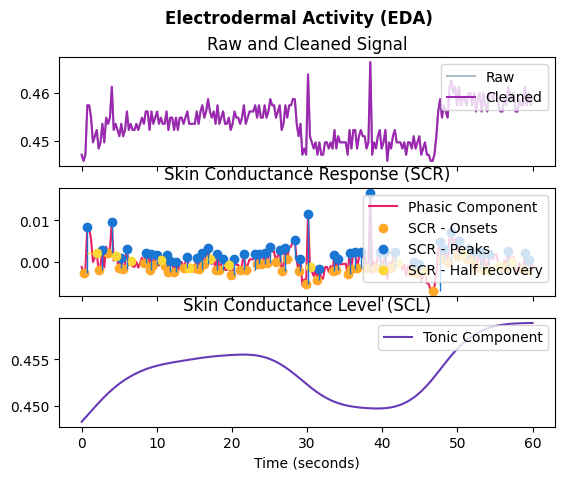

In [ ]:
eda_signal[np.isnan(eda_signal)] = np.mean(eda_signal['Value'])
eda_signal_ = np.squeeze(eda_signal)

  # Replace NaN values with zeros or any other appropriate value


signals, info = nk.eda_process(eda_signal_, sampling_rate=4)
signals
info
nk.eda_plot(signals, info)

In [ ]:
for user in np.arange(len(slices_per_participant)):
  user_epoched=slices_per_participant[user]
len(slices_per_participant)
np.shape(slices_per_participant[0][0][0])

(3,)

In [ ]:
len(slices_per_toplu_df)
Features_all_eda = pd.DataFrame()
EDA_baseline[0]['Value']

72     0.447131
73     0.445850
74     0.447131
75     0.457380
76     0.457380
         ...   
307    0.461224
308    0.457380
309    0.459942
310    0.457380
311    0.458661
Name: Value, Length: 240, dtype: float64

In [ ]:
slices_per_participant[1][2][4]

array([0.175511, 2.      , 1.      ])

/usr/local/lib/python3.10/dist-packages/neurokit2/eda/eda_clean.py:105: NeuroKitWarning: EDA signal is sampled at very low frequency. Skipping filtering.
  warn(


22

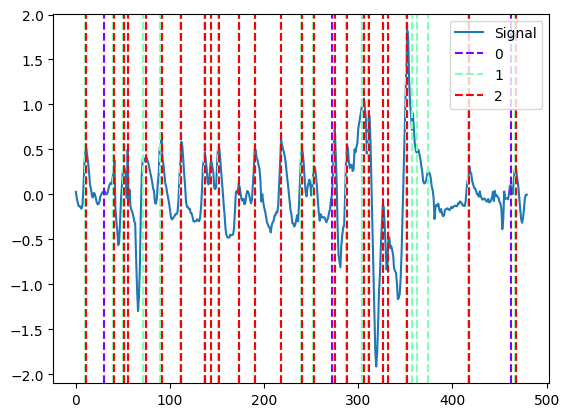

In [ ]:
_sampling_rate=4
# Get phasic component
eda_signal = EDA_stroop[4]['Value']#nk.eda_simulate(duration=30, scr_number=5, drift=0.1, noise=0, sampling_rate=100)

eda_cleaned = nk.eda_clean(eda_signal, sampling_rate=_sampling_rate)

eda = nk.eda_phasic(eda_cleaned, sampling_rate=_sampling_rate)

eda_phasic = eda["EDA_Phasic"].values

# Find peaks
_, kim2004 = nk.eda_peaks(eda_phasic, sampling_rate=_sampling_rate, method="kim2004")

_, neurokit = nk.eda_peaks(eda_phasic, sampling_rate=_sampling_rate, method="neurokit")

_, nabian2018 = nk.eda_peaks(eda_phasic, sampling_rate=_sampling_rate, method="nabian2018")

nk.events_plot([
  nabian2018["SCR_Peaks"],
     kim2004["SCR_Peaks"],
     neurokit["SCR_Peaks"]
  ], eda_phasic)
average_peaks = round((len(nabian2018["SCR_Peaks"]) + len(kim2004["SCR_Peaks"]) + len(neurokit["SCR_Peaks"])) / 3)
average_peaks

{'SCR_Onsets': array([nan]),
 'SCR_Peaks': array([236]),
 'SCR_Height': array([0.54020386])}

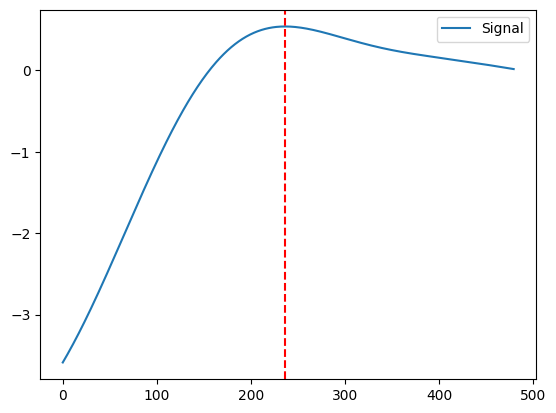

In [ ]:

# Get phasic component
#eda_signal = nk.eda_simulate(duration=30, scr_number=5, drift=0.1, noise=0)

eda_cleaned = nk.eda_clean(eda_signal)

eda = nk.eda_phasic(eda_cleaned)
eda_phasic = eda["EDA_Phasic"].values

# Find and fix peaks
info = nk.eda_findpeaks(eda_phasic)
info = nk.eda_fixpeaks(info)
nk.events_plot(info["SCR_Peaks"], eda_phasic)
info

In [ ]:
a = np.squeeze(slices_per_toplu_df[0][0][0])
slices_per_toplu_df[0][0][0]

array([[0.447131, 0.      , 0.      ],
       [0.44585 , 0.      , 0.      ],
       [0.447131, 0.      , 0.      ],
       [0.45738 , 0.      , 0.      ],
       [0.45738 , 0.      , 0.      ],
       [0.454818, 0.      , 0.      ],
       [0.449693, 0.      , 0.      ],
       [0.450974, 0.      , 0.      ],
       [0.452255, 0.      , 0.      ],
       [0.448412, 0.      , 0.      ],
       [0.449693, 0.      , 0.      ],
       [0.453537, 0.      , 0.      ],
       [0.449693, 0.      , 0.      ],
       [0.454818, 0.      , 0.      ],
       [0.453537, 0.      , 0.      ],
       [0.454818, 0.      , 0.      ]])

In [ ]:
a = np.squeeze(slices_per_toplu_df[2][10][0])
your_array_after_deletion = np.delete(slices_per_toplu_df[0][0][0], 1, axis=1)
your_array_after_deletion = np.delete(your_array_after_deletion, 1, axis=1)
Features_eda = (extract_features_eda(np.squeeze(your_array_after_deletion)))
Features_eda['SCR_Peaks']

/usr/local/lib/python3.10/dist-packages/neurokit2/eda/eda_clean.py:105: NeuroKitWarning: EDA signal is sampled at very low frequency. Skipping filtering.
  warn(


0    2
Name: SCR_Peaks, dtype: int64

In [ ]:
# Iterate through participants and slices
for s in range(len(slices_per_toplu_df)): # baseline 0 stroop 1 ns 2
  for i in range(len(slices_per_toplu_df[s])): # kacıncı participant
      Features_eda_selected_participant = pd.DataFrame()
      for j in range(len(slices_per_toplu_df[s][i])): #kacıncı seans
          # Extract the EDA signal
          your_array_after_deletion = np.delete(slices_per_toplu_df[s][i][j], 1, axis=1)
          your_array_after_deletion = np.delete(your_array_after_deletion, 1, axis=1)
          eda_signal = (np.squeeze(your_array_after_deletion))

          # Check if eda_signal is not empty
          if len(eda_signal) == 0:
              print("EDA signal is empty for participant",s, i, "slice", j)
              continue  # Skip this iteration

          # Calculate the mean over the entire `eda_signal`
          mean_value = np.nanmean(eda_signal)  # Use np.nanmean to handle NaN values

          # Replace NaN values with the computed mean
          eda_signal[np.isnan(eda_signal)] = mean_value

          try:
              # Process the EDA signal
              signals, info = nk.eda_process(eda_signal, sampling_rate=4)
              #nk.eda_plot(signals, info)
              #plt.savefig(f'{output_path_features}/PNG/S{s}_{i+1}_{j}_{j+2 }Ogrenci.png')

              # Extract features from the processed signal
              Features_eda = extract_features_eda(eda_signal)
              Features_eda['Label'] = s
              Features_eda['Participant_Id'] = i

              # Create a DataFrame from the extracted features
              Features_eda_selected_participant = pd.concat([Features_eda_selected_participant, Features_eda], axis=0)
              Features_eda_all = pd.concat([Features_eda_selected_participant, Features_eda_all], axis=0)

              # Save the features to a CSV file
              #Features_eda.to_csv(f'{output_path_features}/CSV/S{s}_{i+1}_{j}_{j+2}Ogrenci.csv', index=False, header=True)
              #driveda yer olmadıgı için alt satırı kapattım şimdilik
              #Features_eda_selected_participant.to_csv(f'{output_path_features}/CSV/S{s}_{i+1}_Ogrenci.csv', index=False, header=True)

          except Exception as e:
              print("Error processing EDA signal for participant", s,"session", i, "slice", j)
              print(e)


In [ ]:
Features_eda_all
Features_eda_all.to_csv(f'{output_path_features}/CSV/All_EDA_Features.csv', index=False, header=True)

In [ ]:
Features_all_eda

,EDA_mean,SCR_mean,SCL_mean,EDA_median,SCR_median,SCL_median,EDA_std,SCR_std,SCL_std,EDA_min,...,SCR_second_abs_diff,EDA_first_abs_diff_norm,SCR_first_abs_diff_norm,SCL_first_abs_diff_norm,EDA_second_abs_diff_norm,SCR_second_abs_diff_norm,SCL_second_abs_diff_norm,SCR_Peaks,Label,Participant_Id
0,0.432772,-0.000847,0.431730,0.432372,-0.001034,0.431794,0.002448,0.002261,0.000542,0.429168,...,0.006039,1.430234,1.574791,0.212379,2.466768,2.670642,0.010839,3,2.0,14.0
0,0.433012,-0.000167,0.431905,0.432372,-0.000362,0.431941,0.002309,0.002326,0.000354,0.430450,...,0.005124,1.257320,1.263173,0.211639,2.218801,2.203358,0.009283,2,2.0,14.0
0,0.433572,0.000457,0.431916,0.432372,-0.000009,0.431949,0.003761,0.003746,0.000345,0.430450,...,0.007689,1.135246,1.160028,0.211834,2.043436,2.052284,0.009142,3,2.0,14.0
0,0.435894,0.001573,0.433705,0.435574,0.001106,0.433760,0.002196,0.002168,0.000301,0.433012,...,0.005673,1.400304,1.426786,0.211477,2.583894,2.616700,0.015623,3,2.0,14.0
0,0.438616,-0.001008,0.439664,0.438136,-0.001382,0.439665,0.002259,0.002212,0.000005,0.435574,...,0.004759,1.172009,1.198858,0.349590,2.106333,2.151465,0.115230,3,2.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.443020,-0.000831,0.444844,0.441979,-0.001440,0.444793,0.002135,0.002035,0.000349,0.440698,...,0.007505,1.720168,1.809749,0.211793,3.514637,3.688175,0.012880,4,NaN,NaN
0,0.443341,0.000450,0.442833,0.443261,0.000055,0.442861,0.002147,0.002017,0.000113,0.439417,...,0.003386,0.875125,0.934499,0.211529,1.576873,1.678290,0.023074,2,NaN,NaN
0,0.443181,-0.000647,0.443232,0.443261,-0.000309,0.443222,0.002099,0.002097,0.000030,0.439417,...,0.004484,1.139487,1.136670,0.258711,2.136529,2.138606,0.054661,3,NaN,NaN
0,0.426046,0.009050,0.410978,0.428528,0.008567,0.411494,0.006687,0.003801,0.002880,0.408671,...,0.007319,0.664181,1.178479,0.212265,1.094806,1.925517,0.015988,3,NaN,NaN


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


nan

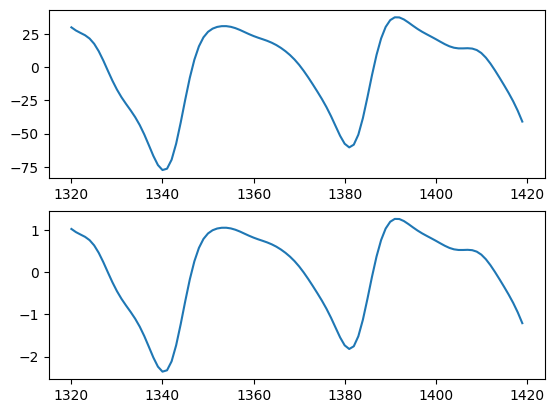

In [ ]:
#DENEME
normalized_BVP = (bvp - np.mean(bvp)) / np.std(bvp)

plt.figure(1)
plt.subplot(211)
plt.plot(bvp)
plt.subplot(212)
plt.plot(normalized_BVP)

np.mean(np.abs(np.diff(normalized_BVP)))

**ML**

In [77]:
from sklearn.model_selection import train_test_split
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score


In [229]:
Features_eda_all

,EDA_mean,SCR_mean,SCL_mean,EDA_median,SCR_median,SCL_median,EDA_std,SCR_std,SCL_std,EDA_min,...,SCR_second_abs_diff,EDA_first_abs_diff_norm,SCR_first_abs_diff_norm,SCL_first_abs_diff_norm,EDA_second_abs_diff_norm,SCR_second_abs_diff_norm,SCL_second_abs_diff_norm,SCR_Peaks,Label,Participant_Id
0,0.432772,-0.000847,0.431730,0.432372,-0.001034,0.431794,0.002448,0.002261,0.000542,0.429168,...,0.006039,1.430234,1.574791,0.212379,2.466768,2.670642,0.010839,3,2,14
0,0.433012,-0.000167,0.431905,0.432372,-0.000362,0.431941,0.002309,0.002326,0.000354,0.430450,...,0.005124,1.257320,1.263173,0.211639,2.218801,2.203358,0.009283,2,2,14
0,0.433572,0.000457,0.431916,0.432372,-0.000009,0.431949,0.003761,0.003746,0.000345,0.430450,...,0.007689,1.135246,1.160028,0.211834,2.043436,2.052284,0.009142,3,2,14
0,0.435894,0.001573,0.433705,0.435574,0.001106,0.433760,0.002196,0.002168,0.000301,0.433012,...,0.005673,1.400304,1.426786,0.211477,2.583894,2.616700,0.015623,3,2,14
0,0.438616,-0.001008,0.439664,0.438136,-0.001382,0.439665,0.002259,0.002212,0.000005,0.435574,...,0.004759,1.172009,1.198858,0.349590,2.106333,2.151465,0.115230,3,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.443341,0.000450,0.442833,0.443261,0.000055,0.442861,0.002147,0.002017,0.000113,0.439417,...,0.003386,0.875125,0.934499,0.211529,1.576873,1.678290,0.023074,2,2,14
0,0.443181,-0.000647,0.443232,0.443261,-0.000309,0.443222,0.002099,0.002097,0.000030,0.439417,...,0.004484,1.139487,1.136670,0.258711,2.136529,2.138606,0.054661,3,2,14
0,0.426046,0.009050,0.410978,0.428528,0.008567,0.411494,0.006687,0.003801,0.002880,0.408671,...,0.007319,0.664181,1.178479,0.212265,1.094806,1.925517,0.015988,3,2,14
0,0.431490,0.001577,0.429505,0.430450,0.000810,0.429548,0.002135,0.002108,0.000203,0.429168,...,0.006043,1.560155,1.584542,0.211493,2.828810,2.866867,0.018214,4,2,14


In [230]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

In [231]:
y = Features_eda_all['Label']
x_ = Features_eda_all.drop('Label',axis=1)
x = x_.drop('Participant_Id',axis=1)
correlation(x,0.8)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(y_test.shape)
evalSet = [(x_train, y_train), (x_test, y_test)]


(7776, 18)
(1944,)


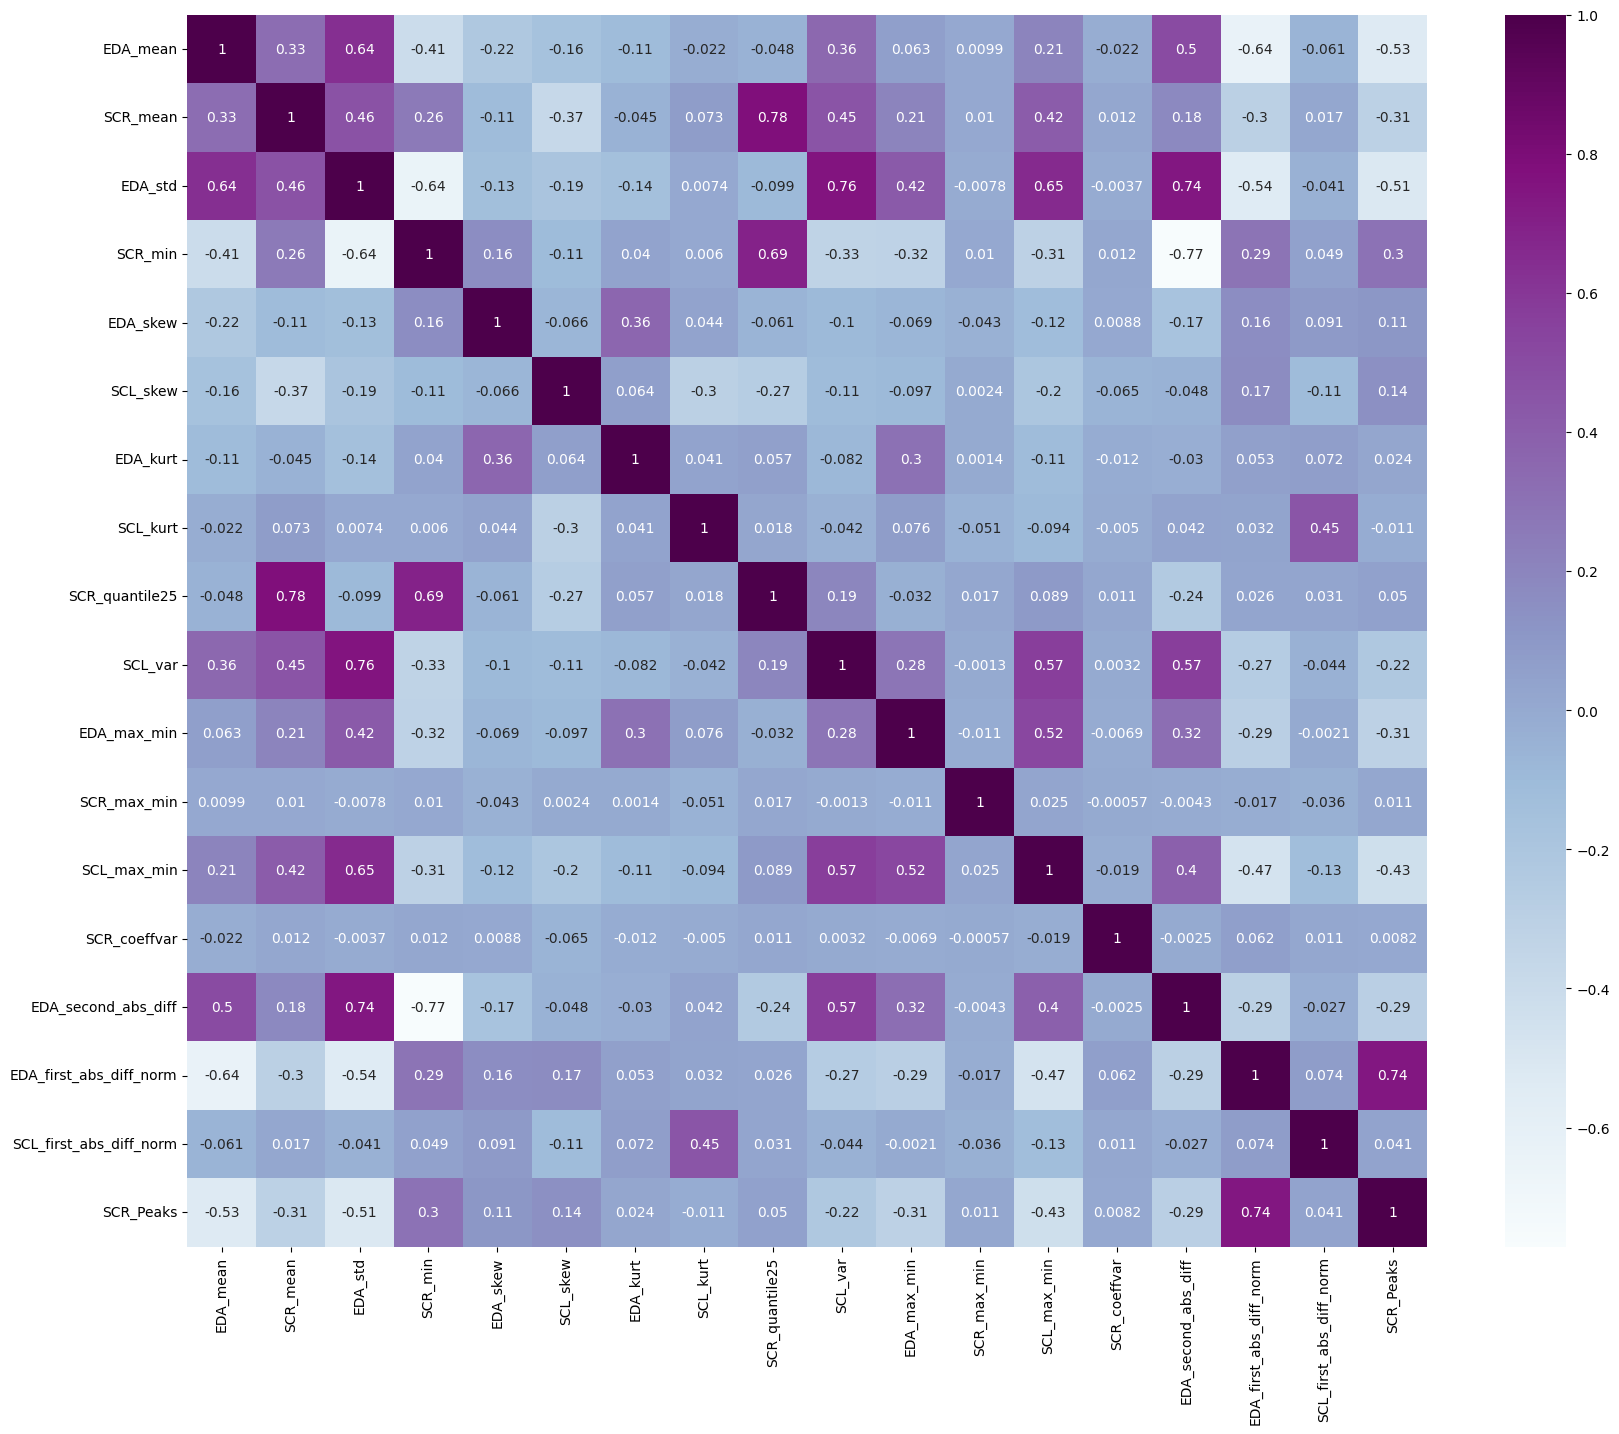

In [232]:
plt.figure(figsize=(20, 16))
sns.heatmap(x_train.corr(), annot=True, cmap=plt.cm.BuPu);

In [236]:
allEda = XGBClassifier(objective = 'multi:softmax',
                              tree_method = 'hist',
                              learning_rate = 0.1,
                              n_estimators = 300,
                              # deterministic_histogram = 'false',
                              gradient_based = 0.1,
                              num_early_stopping_rounds = 20,
                              gamma = 3,
                              #seed = 35,
                              verbosity = 2)
#model.set_params(eval_metric="logloss")

model_allEda = allEda.fit(x_train,y_train,
                              eval_metric=['merror'],
                              eval_set = evalSet)

[0]	validation_0-merror:0.14995	validation_1-merror:0.15998
[1]	validation_0-merror:0.15098	validation_1-merror:0.15895
[2]	validation_0-merror:0.13760	validation_1-merror:0.14249
[3]	validation_0-merror:0.12564	validation_1-merror:0.13477
[4]	validation_0-merror:0.11600	validation_1-merror:0.12809
[5]	validation_0-merror:0.11613	validation_1-merror:0.12551
[6]	validation_0-merror:0.11355	validation_1-merror:0.12449
[7]	validation_0-merror:0.10005	validation_1-merror:0.11060
[8]	validation_0-merror:0.09311	validation_1-merror:0.10031
[9]	validation_0-merror:0.09053	validation_1-merror:0.09825
[10]	validation_0-merror:0.09439	validation_1-merror:0.10237
[11]	validation_0-merror:0.09491	validation_1-merror:0.10031
[12]	validation_0-merror:0.08912	validation_1-merror:0.09671
[13]	validation_0-merror:0.08153	validation_1-merror:0.08488
[14]	validation_0-merror:0.07973	validation_1-merror:0.08385
[15]	validation_0-merror:0.07600	validation_1-merror:0.08025
[16]	validation_0-merror:0.07253	v

###  Model Evaluation


In [237]:
allEda_pred = allEda.predict(x_test)
allEda_report = (classification_report(y_test,
                                         allEda_pred,
                                         labels=np.unique(allEda_pred),
                                         digits=4))

print('----------------------------------------')
print('Balanced Accuracy: {0:.4f}'.format(balanced_accuracy_score(y_test, allEda_pred)))
print(allEda_report)

----------------------------------------
Balanced Accuracy: 0.9757
              precision    recall  f1-score   support

           0     1.0000    0.9375    0.9677       288
           1     0.9901    0.9923    0.9912       904
           2     0.9766    0.9973    0.9868       752

    accuracy                         0.9861      1944
   macro avg     0.9889    0.9757    0.9819      1944
weighted avg     0.9863    0.9861    0.9860      1944



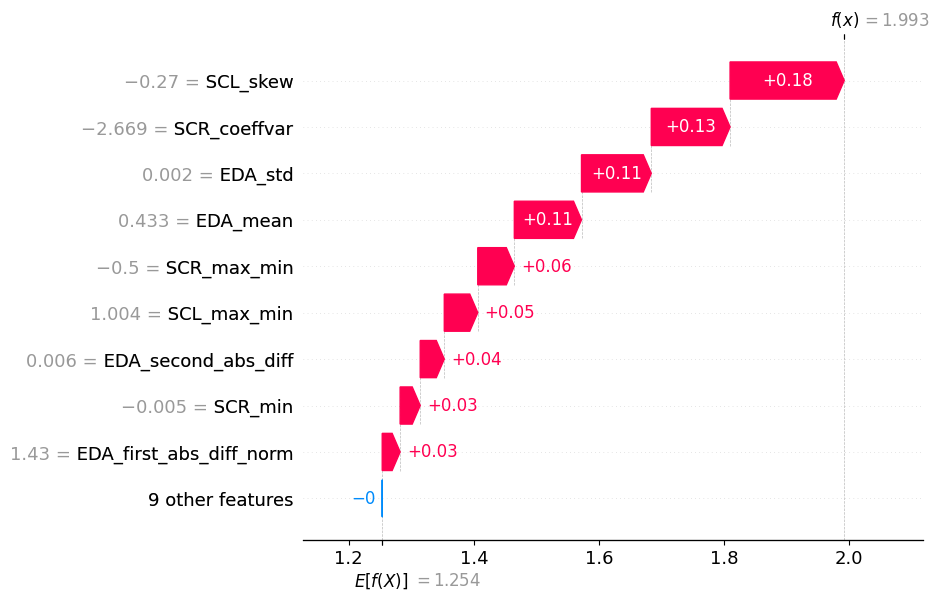

In [238]:
!pip install shap
import xgboost
import shap

# train an XGBoost model
model = xgboost.XGBRegressor().fit(x, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(x)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [239]:
shap.initjs()
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [240]:
shap.initjs()
# visualize all the training set predictions
shap.plots.force(shap_values[:500])

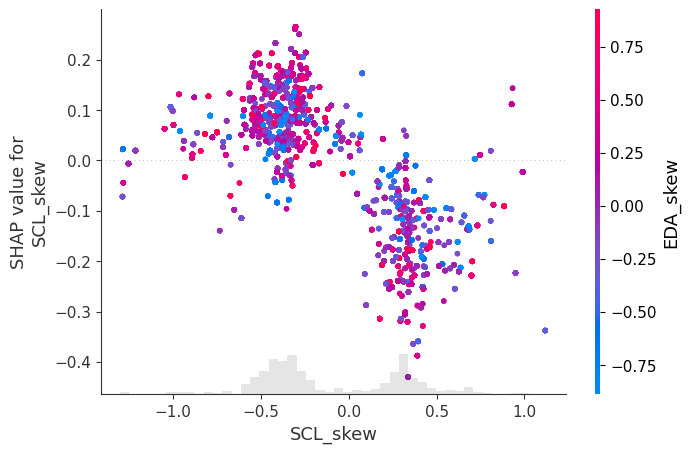

In [241]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "SCL_skew"], color=shap_values)

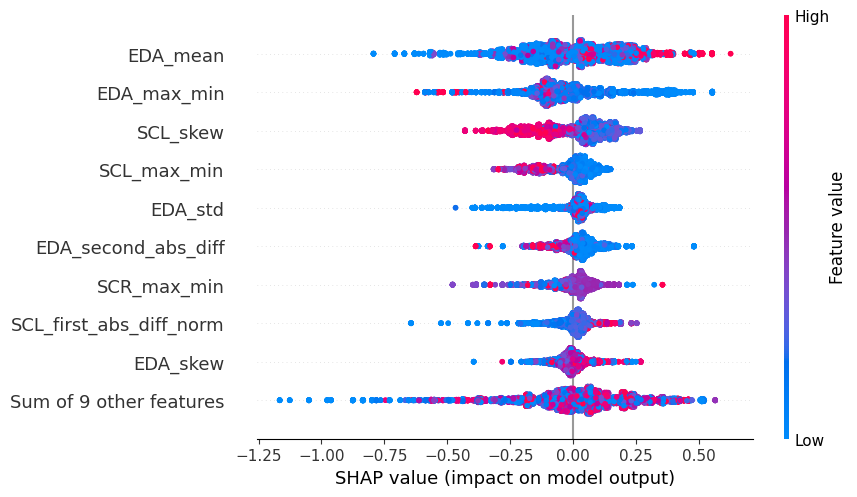

In [242]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

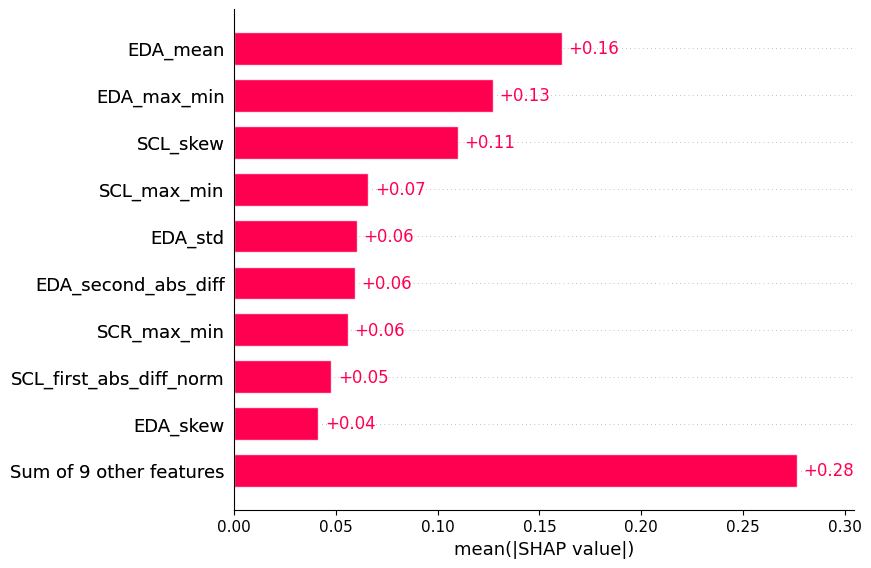

In [243]:
shap.plots.bar(shap_values)

**ANOVA**

In [244]:
!pip install pingouin
import pingouin as pg

In [245]:
type(Features_eda_all)
EDA_baseline_DF = Features_eda_all[(Features_eda_all['Label'] == 0)].copy()
EDA_stroop_DF   = Features_eda_all[(Features_eda_all['Label'] == 1)].copy()
EDA_nostress_DF = Features_eda_all[(Features_eda_all['Label'] == 2)].copy()

EDA_baseline_DF = EDA_baseline_DF.drop (['Label', 'Participant_Id'], axis=1).copy()
EDA_stroop_DF   = EDA_stroop_DF.drop   (['Label', 'Participant_Id'], axis=1).copy()
EDA_nostress_DF = EDA_nostress_DF.drop (['Label', 'Participant_Id'], axis=1).copy()

In [246]:
import scipy.stats
F = []
P = []
for i in range(EDA_baseline_DF.shape[1]):
    fvalue, pvalue = scipy.stats.f_oneway(EDA_baseline_DF.iloc[:,i], EDA_stroop_DF.iloc[:,i], EDA_nostress_DF.iloc[:,i])
    F.append(fvalue)
    P.append(pvalue)

In [247]:
F

[17.55996371178368,
 34.14186361188387,
 17.65896728084128,
 17.643441799696713,
 33.63990243467232,
 17.649717960250822,
 74.65767165331037,
 96.11751877019422,
 61.668713632495724,
 18.356271119448976,
 80.16532625329464,
 17.821226085299802,
 16.925923670172125,
 63.36321938415516,
 17.533596119419137,
 5.640308658169691,
 5.809777768018145,
 39.42975520651569,
 12.801774536922862,
 40.74448598874993,
 8.339979586303748,
 18.25159802925762,
 76.65788245949659,
 17.80271262554166,
 18.004015858328614,
 34.581289915403744,
 17.731148793676486,
 17.1249406951236,
 65.30714426134787,
 17.581841310512626,
 16.94197406758844,
 57.505637416570124,
 17.54156163435587,
 38.54727316340823,
 74.7531475022354,
 42.298751211853826,
 84.97716388654757,
 98.92130829966665,
 61.67080645955744,
 176.7695277756881,
 1.6246040935274166,
 157.94570096627862,
 62.96229974346975,
 85.29843294989136,
 60.97230467818373,
 288.7371107925348,
 30.747165560594414,
 160.1614976913659,
 117.50210252368689,
 112

In [248]:
P

[2.4409176664840114e-08,
 1.6758413324037712e-15,
 2.2116260882064967e-08,
 2.2461043415891512e-08,
 2.75880961354973e-15,
 2.232102272510937e-08,
 6.655456579021207e-33,
 4.615698066463659e-42,
 2.433139267445221e-27,
 1.1040653561706759e-08,
 2.9427084863927974e-35,
 1.881481570139971e-08,
 4.5913396171599355e-08,
 4.566688912337574e-28,
 2.5058970350135316e-08,
 0.0035634103522610466,
 0.0030085204121752737,
 8.810238944730233e-18,
 2.8026693413466727e-06,
 2.3915525211697762e-18,
 0.00024049057287675355,
 1.2254147644884118e-08,
 9.285754907162168e-34,
 1.916509131189123e-08,
 1.5682199837802646e-08,
 1.0832600133212888e-15,
 2.0581519236130436e-08,
 3.765383756924931e-08,
 6.704998057417879e-29,
 2.388284434912008e-08,
 4.518486930225177e-08,
 1.4868340480036298e-25,
 2.486086786977564e-08,
 2.1144318448188038e-17,
 6.058165519192872e-33,
 5.121426822836742e-19,
 2.5936708422290636e-37,
 2.9547932183586743e-43,
 2.428116145151272e-27,
 3.922619416273138e-76,
 0.1970431510517575,
 

In [249]:
y = Features_eda_all['Label']
x_ = Features_eda_all.drop('Label',axis=1)
x = x_.drop('Participant_Id',axis=1)
correlation(x,0.5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(y_test.shape)
evalSet = [(x_train, y_train), (x_test, y_test)]


(7776, 13)
(1944,)


In [250]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split

In [251]:
# Join a sequence of arrays along an row axis.
X = x
z = np.zeros(205)
o = np.ones(205)
Y = y
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (9720, 13)
Y shape:  (9720,)


In [252]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [253]:
x_train = X_train
x_test = X_test
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (8262, 13)
x test:  (1458, 13)
y train:  (8262,)
y test:  (1458,)


In [254]:
# short description and example of definition (def)
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)     # result = 8

# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
# Forward propagation steps:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients
  # Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)
 # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)

    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

In [264]:
x_train = X_train
x_test = X_test
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 300)

x train:  (8262, 13)
x test:  (1458, 13)
y train:  (8262,)
y test:  (1458,)
Epoch 1/300
259/259 [==============================] - 2s 3ms/step - loss: 0.3927 - accuracy: 0.4691
Epoch 2/300
259/259 [==============================] - 1s 3ms/step - loss: 0.3624 - accuracy: 0.4702
Epoch 3/300
259/259 [==============================] - 1s 3ms/step - loss: 0.3595 - accuracy: 0.4706
Epoch 4/300
259/259 [==============================] - 1s 5ms/step - loss: 0.3572 - accuracy: 0.4706
Epoch 5/300
259/259 [==============================] - 1s 6ms/step - loss: 0.3547 - accuracy: 0.4700
Epoch 6/300
259/259 [==============================] - 1s 6ms/step - loss: 0.3528 - accuracy: 0.4701
Epoch 7/300
259/259 [==============================] - 1s 5ms/step - loss: 0.3524 - accuracy: 0.4690
Epoch 8/300
259/259 [==============================] - 1s 6ms/step - loss: 0.3504 - accuracy: 0.4699
Epoch 9/300
259/259 [==============================] - 2s 6ms/step - loss: 0.3495 - accuracy: 0.4697
Epoch 10/300
25

In [261]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Generate some synthetic data for demonstration
x_train = X_train
x_test = X_test
y_train = Y_train.T
y_test = Y_test.T
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression implementation using TensorFlow
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate=0.01, num_iterations=150):
    # Convert the labels to one-hot encoding
    y_train_onehot = tf.one_hot(y_train, depth=2)
    y_test_onehot = tf.one_hot(y_test, depth=2)

    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, activation='softmax', input_shape=(13,))
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(x_train, y_train_onehot, epochs=num_iterations, verbose=1)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot)
    print(f'Test Accuracy: {test_accuracy}')

# Call the logistic_regression function
logistic_regression(x_train, y_train, x_test, y_test, learning_rate=0.01, num_iterations=150)


Epoch 1/150
243/243 [==============================] - 2s 4ms/step - loss: 0.3898 - accuracy: 0.4698
Epoch 2/150
243/243 [==============================] - 1s 5ms/step - loss: 0.3617 - accuracy: 0.4722
Epoch 3/150
243/243 [==============================] - 1s 6ms/step - loss: 0.3567 - accuracy: 0.4739
Epoch 4/150
243/243 [==============================] - 1s 6ms/step - loss: 0.3561 - accuracy: 0.4731
Epoch 5/150
243/243 [==============================] - 1s 6ms/step - loss: 0.3528 - accuracy: 0.4729
Epoch 6/150
243/243 [==============================] - 1s 5ms/step - loss: 0.3520 - accuracy: 0.4726
Epoch 7/150
243/243 [==============================] - 1s 3ms/step - loss: 0.3516 - accuracy: 0.4726
Epoch 8/150
243/243 [==============================] - 1s 3ms/step - loss: 0.3499 - accuracy: 0.4724
Epoch 9/150
243/243 [==============================] - 2s 9ms/step - loss: 0.3499 - accuracy: 0.4721
Epoch 10/150
243/243 [==============================] - 1s 3ms/step - loss: 0.3490 - accura

KeyboardInterrupt: ignored